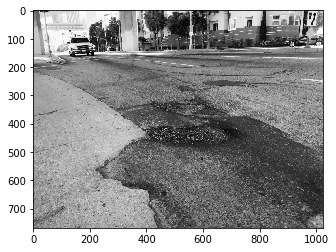

In [9]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "c:/Users/Rudy/Desktop/DataViz/RoadHazardImageClassification/data"
CATEGORIES = ['potholes', 'road_cracks']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [8]:
# Print pixel data
print(img_array.shape)
print(img_array)

(768, 1024)
[[137 125 118 ... 199 206 210]
 [137 126 119 ... 196 193 193]
 [134 128 120 ... 186 186 193]
 ...
 [123 152 130 ... 132 139 144]
 [147 139 129 ... 131 133 140]
 [160 162 148 ... 110  99 124]]


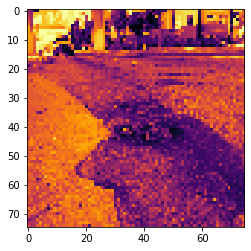

In [24]:
img_size = 75 # increase based on size of desired item in image

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='inferno')
plt.show()